# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [604]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [606]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
# properties = pd.read_excel()(url_LondonHousePrices, sheet_name='Average price', index_col= None)
import requests  
from io import BytesIO  
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
url_LondonHousePrices2 = BytesIO(requests.get(url_LondonHousePrices).content)
properties = pd.read_excel(url_LondonHousePrices2, sheet_name='Average price', index_col= None)
print(properties)

    Unnamed: 0 City of London Barking & Dagenham     Barnet     Bexley  \
0          NaT      E09000001          E09000002  E09000003  E09000004   
1   1995-01-01          90347              51870      98948      64956   
2   1995-02-01          81213              52513      98848      64786   
3   1995-03-01          78168              52701      97848      64366   
4   1995-04-01          76172              54618      96273      64276   
..         ...            ...                ...        ...        ...   
359 2024-11-01         745121             351242     629875     406255   
360 2024-12-01         823237             353220     625178     405368   
361 2025-01-01         810573             351832     612454     406561   
362 2025-02-01         798307             362556     605640     408568   
363 2025-03-01         718463             370501     604875     408318   

         Brent    Bromley     Camden    Croydon     Ealing  ... NORTH WEST  \
0    E09000005  E09000006  E09000

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [291]:
properties.shape

(364, 49)

In [293]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,90347,51870,98948,64956,76880,83082,119775,70118,85469,...,40907,42171,43856,46470,56098,79687,64502,52799,NaN,50231
2,1995-02-01,81213,52513,98848,64786,77651,83068,118365,69908,86551,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
3,1995-03-01,78168,52701,97848,64366,77644,82856,119131,69666,87067,...,41351,42544,43701,47345,55574,79110,64597,51716,NaN,50229
4,1995-04-01,76172,54618,96273,64276,78668,82525,118948,69562,87933,...,41195,42934,44414,47359,55966,79708,65111,52877,NaN,50597


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [295]:
properties_T=properties.T

In [297]:
properties_T.head()

,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00
City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,103215,...,836988,778044,779211,795056,778662,745121,823237,810573,798307,718463
Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,52909,...,335460,333844,331966,336744,346844,351242,353220,351832,362556,370501
Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,98936,...,619969,623966,625759,622994,626200,629875,625178,612454,605640,604875
Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,64508,...,400200,398779,403632,405404,407520,406255,405368,406561,408568,408318


In [299]:
properties_T.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [301]:
properties_T = properties_T.reset_index()

In [303]:
properties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,354,355,356,357,358,359,360,361,362,363
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,836988,778044,779211,795056,778662,745121,823237,810573,798307,718463
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,335460,333844,331966,336744,346844,351242,353220,351832,362556,370501
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,619969,623966,625759,622994,626200,629875,625178,612454,605640,604875
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,400200,398779,403632,405404,407520,406255,405368,406561,408568,408318


In [305]:
properties_T.index

RangeIndex(start=0, stop=49, step=1)

In [307]:
properties_T.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           354,     355,     356,     357,     358,     359,     360,     361,
           362,     363],
      dtype='object', length=365)

In [309]:
properties_T.iloc[[0]]

,index,0,1,2,3,4,5,6,7,8,...,354,355,356,357,358,359,360,361,362,363
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00


In [311]:
# properties_T.columns=properties_T.iloc[0]
properties_T.columns = properties_T.iloc[0]

In [313]:
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,836988,778044,779211,795056,778662,745121,823237,810573,798307,718463
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,335460,333844,331966,336744,346844,351242,353220,351832,362556,370501
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,619969,623966,625759,622994,626200,629875,625178,612454,605640,604875
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,400200,398779,403632,405404,407520,406255,405368,406561,408568,408318


In [315]:
properties_T = properties_T.drop(0)

In [319]:
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,836988,778044,779211,795056,778662,745121,823237,810573,798307,718463
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,335460,333844,331966,336744,346844,351242,353220,351832,362556,370501
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,619969,623966,625759,622994,626200,629875,625178,612454,605640,604875
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,400200,398779,403632,405404,407520,406255,405368,406561,408568,408318
5,Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,...,563027,565386,575833,583797,593512,594889,573473,569368,557533,569764


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [325]:
properties_T=properties_T.rename(columns={'Unnamed: 0': 'London_Borough', pd.NaT: 'ID'})
properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,836988,778044,779211,795056,778662,745121,823237,810573,798307,718463
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,335460,333844,331966,336744,346844,351242,353220,351832,362556,370501
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,619969,623966,625759,622994,626200,629875,625178,612454,605640,604875
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,400200,398779,403632,405404,407520,406255,405368,406561,408568,408318
5,Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,...,563027,565386,575833,583797,593512,594889,573473,569368,557533,569764


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [327]:
clean_properties = pd.melt(properties_T, id_vars = ['London_Borough', 'ID'])

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [329]:
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01 00:00:00,90347
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870
2,Barnet,E09000003,1995-01-01 00:00:00,98948
3,Bexley,E09000004,1995-01-01 00:00:00,64956
4,Brent,E09000005,1995-01-01 00:00:00,76880


In [331]:
clean_properties = clean_properties.rename(columns={0: 'month', 'value': 'Average_price'})

In [333]:
clean_properties.head()

,London_Borough,ID,month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870
2,Barnet,E09000003,1995-01-01 00:00:00,98948
3,Bexley,E09000004,1995-01-01 00:00:00,64956
4,Brent,E09000005,1995-01-01 00:00:00,76880


In [335]:
clean_properties.dtypes

London_Borough    object
ID                object
month             object
Average_price     object
dtype: object

In [337]:
clean_properties['Average_price']=pd.to_numeric(clean_properties['Average_price'])

In [341]:
clean_properties.dtypes

London_Borough     object
ID                 object
month              object
Average_price     float64
dtype: object

In [343]:
clean_properties.count()

London_Borough    17424
ID                16335
month             17424
Average_price     16335
dtype: int64

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [357]:
clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [361]:
clean_properties[clean_properties['London_Borough'] == 'Unnamed'].head()

,London_Borough,ID,month,Average_price


In [375]:
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 37'].head()

,London_Borough,ID,month,Average_price
36,Unnamed: 37,NaN,1995-01-01 00:00:00,NaN
84,Unnamed: 37,NaN,1995-02-01 00:00:00,NaN
132,Unnamed: 37,NaN,1995-03-01 00:00:00,NaN
180,Unnamed: 37,NaN,1995-04-01 00:00:00,NaN
228,Unnamed: 37,NaN,1995-05-01 00:00:00,NaN


In [379]:
NaNFreeDF2 = clean_properties.dropna()
NaNFreeDF2.head()

,London_Borough,ID,month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.0
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.0
2,Barnet,E09000003,1995-01-01 00:00:00,98948.0
3,Bexley,E09000004,1995-01-01 00:00:00,64956.0
4,Brent,E09000005,1995-01-01 00:00:00,76880.0


In [383]:
NaNFreeDF2.count()

London_Borough    16335
ID                16335
month             16335
Average_price     16335
dtype: int64

In [391]:
NaNFreeDF2['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [399]:
print(clean_properties.shape)
print(NaNFreeDF2.shape)

(17424, 4)
(16335, 4)


In [407]:
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

In [439]:
NaNFreeDF2[NaNFreeDF2['London_Borough'].isin(nonBoroughs)]

,London_Borough,ID,month,Average_price
34,Inner London,E13000001,1995-01-01 00:00:00,85892.0
35,Outer London,E13000002,1995-01-01 00:00:00,76196.0
37,NORTH EAST,E12000001,1995-01-01 00:00:00,39809.0
38,NORTH WEST,E12000002,1995-01-01 00:00:00,40907.0
39,YORKS & THE HUMBER,E12000003,1995-01-01 00:00:00,42171.0
...,...,...,...,...
17418,EAST OF ENGLAND,E12000006,2025-03-01 00:00:00,343876.0
17419,LONDON,E12000007,2025-03-01 00:00:00,552073.0
17420,SOUTH EAST,E12000008,2025-03-01 00:00:00,386316.0
17421,SOUTH WEST,E12000009,2025-03-01 00:00:00,310837.0


In [441]:
NaNFreeDF2[~NaNFreeDF2['London_Borough'].isin(nonBoroughs)]

,London_Borough,ID,month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.0
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.0
2,Barnet,E09000003,1995-01-01 00:00:00,98948.0
3,Bexley,E09000004,1995-01-01 00:00:00,64956.0
4,Brent,E09000005,1995-01-01 00:00:00,76880.0
...,...,...,...,...
17404,Sutton,E09000029,2025-03-01 00:00:00,436424.0
17405,Tower Hamlets,E09000030,2025-03-01 00:00:00,497367.0
17406,Waltham Forest,E09000031,2025-03-01 00:00:00,522282.0
17407,Wandsworth,E09000032,2025-03-01 00:00:00,704342.0


In [443]:
NaNFreeDF2 = NaNFreeDF2[~NaNFreeDF2['London_Borough'].isin(nonBoroughs)]

In [447]:
df=NaNFreeDF2

In [449]:
df.head()

,London_Borough,ID,month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.0
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.0
2,Barnet,E09000003,1995-01-01 00:00:00,98948.0
3,Bexley,E09000004,1995-01-01 00:00:00,64956.0
4,Brent,E09000005,1995-01-01 00:00:00,76880.0


In [451]:
df.count()

London_Borough    11979
ID                11979
month             11979
Average_price     11979
dtype: int64

In [459]:
df.dtypes

London_Borough     object
ID                 object
month              object
Average_price     float64
dtype: object

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [469]:
camden_prices = df[df['London_Borough'] == 'Camden']

C:\Users\User\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Text(0, 0.5, 'Price')

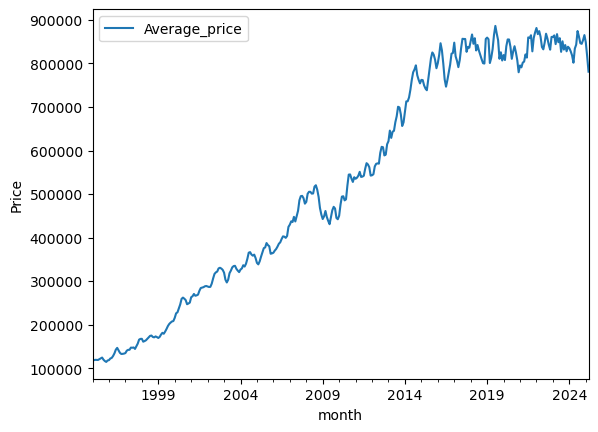

In [477]:
ax = camden_prices.plot(kind ='line', x = 'month', y='Average_price')
ax.set_ylabel('Price')

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [479]:
df['year'] = df['month'].apply(lambda t: t.year)
df.sample(10)

C:\Users\User\AppData\Local\Temp\ipykernel_34520\4288776540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['month'].apply(lambda t: t.year)


,London_Borough,ID,month,Average_price,year
1328,Westminster,E09000033,1997-04-01 00:00:00,171833.0,1997
17070,Waltham Forest,E09000031,2024-08-01 00:00:00,500874.0,2024
8513,Hounslow,E09000018,2009-10-01 00:00:00,278466.0,2009
13828,Brent,E09000005,2019-01-01 00:00:00,516550.0,2019
5389,Haringey,E09000014,2004-05-01 00:00:00,249326.0,2004
5291,Hackney,E09000012,2004-03-01 00:00:00,222938.0,2004
302,Harrow,E09000015,1995-07-01 00:00:00,86181.0,1995
10994,Barnet,E09000003,2014-02-01 00:00:00,428359.0,2014
3000,Newham,E09000025,2000-03-01 00:00:00,90611.0,2000
16957,Haringey,E09000014,2024-06-01 00:00:00,596828.0,2024


In [487]:
dfg = df.groupby(by=['London_Borough', 'year']).mean(numeric_only=True)
dfg.head()

Average_price
London_Borough     year               
Barking & Dagenham 1995   53265.416667
                   1996   53162.666667
                   1997   57537.583333
                   1998   61969.666667
                   1999   67145.333333

In [515]:
dfg = dfg.reset_index()
dfg.head()

,level_0,index,London_Borough,year,Average_price
0,0,0,Barking & Dagenham,1995,53265.416667
1,1,1,Barking & Dagenham,1996,53162.666667
2,2,2,Barking & Dagenham,1997,57537.583333
3,3,3,Barking & Dagenham,1998,61969.666667
4,4,4,Barking & Dagenham,1999,67145.333333


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [527]:
dfg[['Average_price', 'London_Borough']][dfg['year'] == 1995]

,Average_price,London_Borough
0,53265.416667,Barking & Dagenham
31,97365.083333,Barnet
62,64289.750000,Bexley
93,78737.416667,Brent
124,83382.916667,Bromley
155,119215.083333,Camden
186,97891.416667,City of London
217,69879.750000,Croydon
248,86895.000000,Ealing
279,76454.666667,Enfield


In [533]:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['year']==1998])
    y2018 = float(d['Average_price'][d['year']==2018])
    ratio = [y2018/y1998]
    return ratio

In [535]:
create_price_ratio(dfg[dfg['London_Borough'] == 'Barking & Dagenham'])

C:\Users\User\AppData\Local\Temp\ipykernel_34520\3506190537.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y1998 = float(d['Average_price'][d['year']==1998])
C:\Users\User\AppData\Local\Temp\ipykernel_34520\3506190537.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y2018 = float(d['Average_price'][d['year']==2018])


[4.896419753750491]

In [541]:
final = {}

In [545]:
for b in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough'] == b]
    final[b] = create_price_ratio(borough)
print(final)
    

{'Barking & Dagenham': [4.896419753750491], 'Barnet': [4.357781583136056], 'Bexley': [4.249831017882133], 'Brent': [4.895458676582117], 'Bromley': [4.094844535695022], 'Camden': [4.934042636046768], 'City of London': [5.302624411390646], 'Croydon': [4.200990306743318], 'Ealing': [4.311774701171111], 'Enfield': [4.262742326434982], 'Greenwich': [4.763570367287282], 'Hackney': [6.198333689539375], 'Hammersmith & Fulham': [4.138940818546001], 'Haringey': [5.134551273214393], 'Harrow': [4.059150558219601], 'Havering': [4.325868090043559], 'Hillingdon': [4.200285475242334], 'Hounslow': [3.9770769170792564], 'Islington': [4.841875765516273], 'Kensington & Chelsea': [5.0821736365191414], 'Kingston upon Thames': [4.270039865280501], 'Lambeth': [4.958197908650582], 'Lewisham': [5.447926380342587], 'Merton': [4.745154894743145], 'Newham': [5.307659578480389], 'Redbridge': [4.470182934491858], 'Richmond upon Thames': [4.002758912594101], 'Southwark': [5.5163703746415], 'Sutton': [4.11887818309415

C:\Users\User\AppData\Local\Temp\ipykernel_34520\3506190537.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y1998 = float(d['Average_price'][d['year']==1998])
C:\Users\User\AppData\Local\Temp\ipykernel_34520\3506190537.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y2018 = float(d['Average_price'][d['year']==2018])


In [551]:
df_ratios = pd.DataFrame(final)
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,4.89642,4.357782,4.249831,4.895459,4.094845,4.934043,5.302624,4.20099,4.311775,4.262742,...,4.745155,5.30766,4.470183,4.002759,5.51637,4.118878,4.626734,5.835128,4.757574,5.352731


In [579]:
df_ratios_T = df_ratios.T
df_ratios_T.head()

,0
Barking & Dagenham,4.896420
Barnet,4.357782
Bexley,4.249831
Brent,4.895459
Bromley,4.094845


In [587]:
df_ratios_T.reset_index()
df_ratio = df_ratios_T.reset_index()
df_ratio.head()

,index,0
0,Barking & Dagenham,4.896420
1,Barnet,4.357782
2,Bexley,4.249831
3,Brent,4.895459
4,Bromley,4.094845


In [591]:
df_ratio.rename(columns={'index': 'Borough', 0: '2018'}, inplace=True) 
df_ratio.head()

,Borough,2018
0,Barking & Dagenham,4.896420
1,Barnet,4.357782
2,Bexley,4.249831
3,Brent,4.895459
4,Bromley,4.094845


In [597]:
top15 = df_ratio.sort_values(by='2018', ascending=False).head(15)
print(top15)

                 Borough      2018
11               Hackney  6.198334
30        Waltham Forest  5.835128
27             Southwark  5.516370
22              Lewisham  5.447926
32           Westminster  5.352731
24                Newham  5.307660
6         City of London  5.302624
13              Haringey  5.134551
19  Kensington & Chelsea  5.082174
21               Lambeth  4.958198
5                 Camden  4.934043
0     Barking & Dagenham  4.896420
3                  Brent  4.895459
18             Islington  4.841876
10             Greenwich  4.763570


[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Haringey'),
 Text(8, 0, 'Kensington & Chelsea'),
 Text(9, 0, 'Lambeth'),
 Text(10, 0, 'Camden'),
 Text(11, 0, 'Barking & Dagenham'),
 Text(12, 0, 'Brent'),
 Text(13, 0, 'Islington'),
 Text(14, 0, 'Greenwich')]

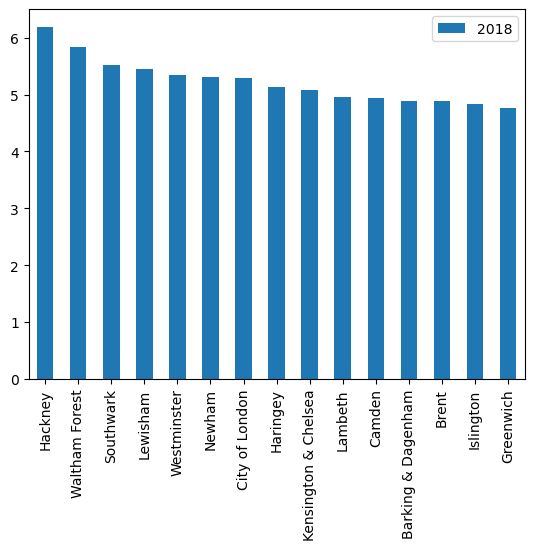

In [601]:
ax = top15[['Borough', '2018']].plot(kind='bar')
ax.set_xticklabels(top15.Borough)

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 



In [ ]:
Which boroughs of London have seen the greatest increase in housing process, on average, over the last two decades. So far, we have started by loading and 
extracting the data. We checked the shape and size of the data, and the data had 364 rows and 49 columns.  The data was cleaned, transformed, and visualized
by applying various commands like resetting the index, removing the unwanted columns, by renaming the columns with appropriate variables, and/or dropping 
the null values. Plotting the data for a particular borough, month vs. price, gives us the rate of price increase throughout two decades. Grouping the data
by Boroughs and year columns and taking the mean gives us the mean house price for each year. Lastly, modelling of data was done by creating a function 
that calculates a ratio of house prices, which compares the price of a house in 2018 to the price in 1998. Creating a data frame for all of the values 
that we got by applying la oop gives us a plot for the top 15 boroughs in 2018, plotted against their price ratios.  And the plot states that Hackney had
the highest price in 2018, which started to decrease uniformly for different boroughs. 
